<a href="https://colab.research.google.com/github/FeisTfue/distancias-clustering/blob/main/distancia_euclidiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resultado final:
Número de dato | X | Y | Asignación al clúster
1 | 185 | 72 | 1
2 | 170 | 56 | 2
3 | 168 | 60 | 2
4 | 179 | 68 | 1
5 | 182 | 72 | 1
6 | 188 | 77 | 1


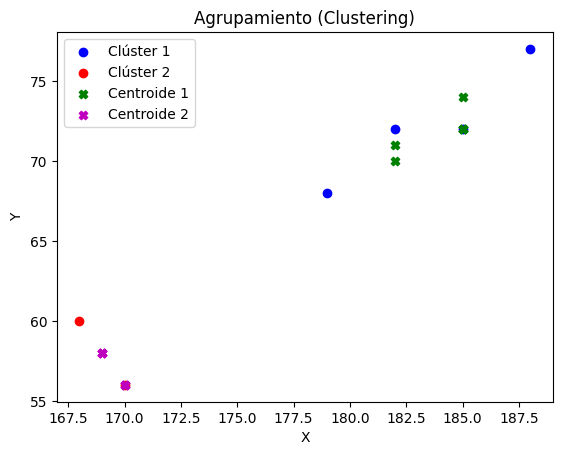

In [4]:
import matplotlib.pyplot as plt

# Datos iniciales
datos = [
    (1, 185, 72),
    (2, 170, 56),
    (3, 168, 60),
    (4, 179, 68),
    (5, 182, 72),
    (6, 188, 77)
]

# Coordenadas de los centroides iniciales C1 y C2
C1 = (185, 72)
C2 = (170, 56)

# Función para calcular la distancia euclidiana entre dos puntos
def distancia_euclidiana(punto1, punto2):
    x1, y1 = punto1
    x2, y2 = punto2
    distancia = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    return distancia

# Listas para almacenar los puntos asignados a cada clúster
clúster1_puntos = []
clúster2_puntos = []

# Listas para almacenar las coordenadas de los centroides a lo largo de las iteraciones
C1_x = [C1[0]]
C1_y = [C1[1]]
C2_x = [C2[0]]
C2_y = [C2[1]]

# Asignar puntos a clústeres y actualizar centroides
for item in datos:
    número, altura, peso = item
    distancia_a_C1 = distancia_euclidiana((altura, peso), C1)
    distancia_a_C2 = distancia_euclidiana((altura, peso), C2)

    if distancia_a_C1 < distancia_a_C2:
        asignación = 1
        C1 = ((C1[0] + altura) / 2, (C1[1] + peso) / 2)  # Actualizar C1
        clúster1_puntos.append((altura, peso))
    else:
        asignación = 2
        C2 = ((C2[0] + altura) / 2, (C2[1] + peso) / 2)  # Actualizar C2
        clúster2_puntos.append((altura, peso))

    # Actualizar las listas de coordenadas de los centroides para la visualización
    C1_x.append(C1[0])
    C1_y.append(C1[1])
    C2_x.append(C2[0])
    C2_y.append(C2[1])

# Imprimir la tabla final de asignaciones
print("Resultado final:")
print("Número de dato | X | Y | Asignación al clúster")
for i, item in enumerate(datos, start=1):
    número, altura, peso = item
    distancia_a_C1 = distancia_euclidiana((altura, peso), C1)
    distancia_a_C2 = distancia_euclidiana((altura, peso), C2)

    if distancia_a_C1 < distancia_a_C2:
        asignación = 1
    else:
        asignación = 2

    print(f"{número} | {altura} | {peso} | {asignación}")

# Visualizar los puntos de datos y los centroides
plt.scatter(*zip(*clúster1_puntos), c='b', label='Clúster 1')
plt.scatter(*zip(*clúster2_puntos), c='r', label='Clúster 2')
plt.scatter(C1_x, C1_y, c='g', label='Centroide 1', marker='X')
plt.scatter(C2_x, C2_y, c='m', label='Centroide 2', marker='X')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.title('Agrupamiento (Clustering)')
plt.show()